In [1]:
%autosave 0

Autosave disabled


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from adam_wrangle import clean_grades
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

seed = 55

Let's read in the grades data from the wrangle module.

In [3]:
df = clean_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


Before scaling, what **important** step do we have to complete?

In [4]:
# we have to split our data so we only learn on train

In [5]:
train, val_test = train_test_split(df, train_size=0.7,
                                  random_state = seed)
val , test = train_test_split(val_test, train_size = 0.5,
                             random_state=seed)

In [6]:
train.shape

(71, 5)

Let's take a pass at the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). What kind of transformation does this scaler perform, and what will be the resulting range of values?

In [ ]:
# linear transformation which will retain the shape of our data and resulting values will be from 0 to 1.

In [8]:
mms = MinMaxScaler()
mms.fit(train[['final_grade']])

MinMaxScaler()

In [ ]:
scaler fit only to the train

In [9]:
train['final_grade_mms'] = mms.transform(train[['final_grade']])

In [11]:
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms
21,23,62.0,70,79,70,0.15625
68,70,93.0,90,96,97,1.00000
16,18,93.0,90,96,97,1.00000
35,37,58.0,65,70,68,0.09375
12,14,100.0,90,95,96,0.96875


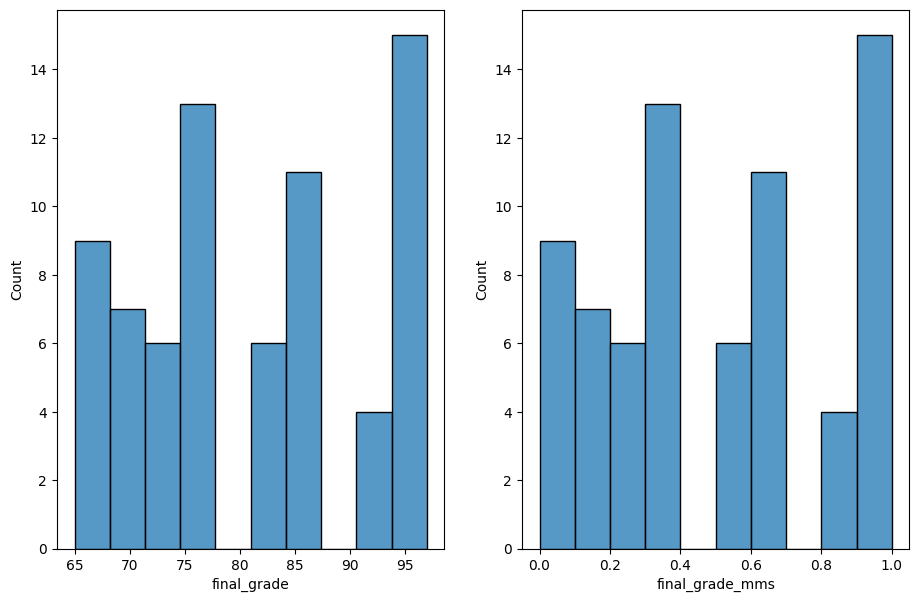

In [16]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.histplot(data=train, x='final_grade', bins=10)

plt.subplot(1,2,2)
sns.histplot(data=train, x='final_grade_mms', bins=10)

plt.show()

In [18]:
def compare_data(original ,scaled_col, df = train):
    
    plt.figure(figsize=(11,7))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=original, bins=10)

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=scaled_col, bins=10)

    plt.show()

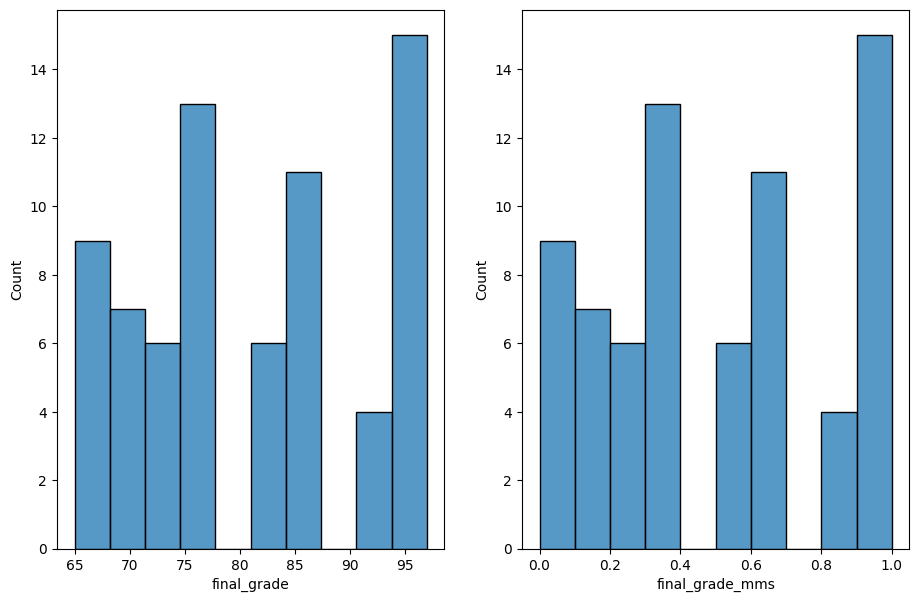

In [19]:
compare_data('final_grade', 'final_grade_mms')

Next up is the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). What kind of transformation is this, and what is the resulting range of values?

Linear transformation

We are expecting to see a mean of 0 and a standard deviation of 1. This will result in small negative and poitive values

In [20]:
ss = StandardScaler()
ss.fit(train[['final_grade']]) = ss.transform(train[['final_grade']])
train.head()

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (4022116153.py, line 2)

Last up we have the [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). What kind of transformation and what resulting range of values?

In [22]:
# create an instance of the robust scaler object
rs = RobustScaler()

# fit the object to our secired column
rs.fit(train[['final_grade']])

#transform features and assign to column
train['final_grade_rs'] = rs.transform(train[['final_grade']])

# check

train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_rs
21,23,62.0,70,79,70,0.15625,-0.523810
68,70,93.0,90,96,97,1.00000,0.761905
16,18,93.0,90,96,97,1.00000,0.761905
35,37,58.0,65,70,68,0.09375,-0.619048
12,14,100.0,90,95,96,0.96875,0.714286


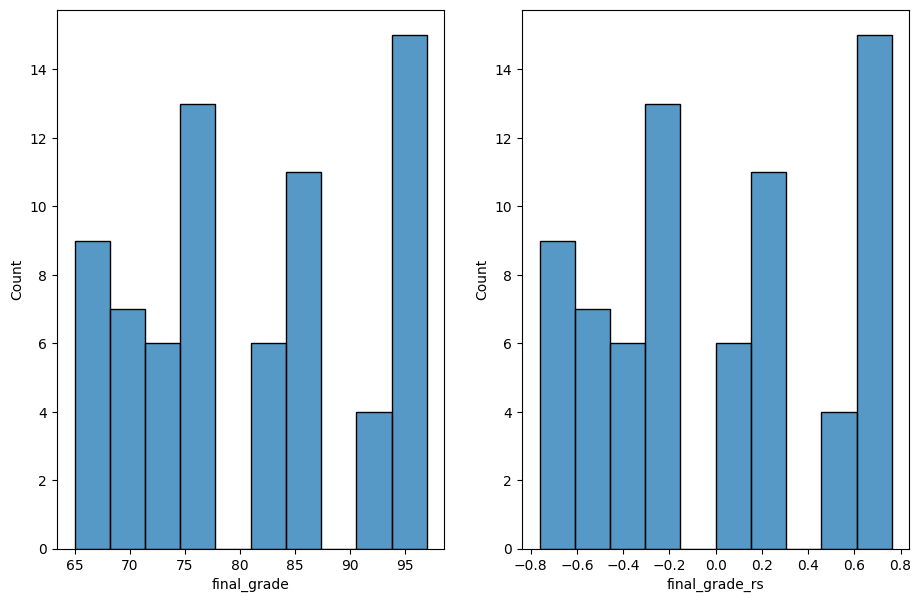

In [23]:
compare_data('final_grade','final_grade_rs')

We can scale more than one column at once

In [25]:
mms = MinMaxScaler()

mms.fit(train[['exam1','exam2', 'exam3']])

train[['exam1','exam2', 'exam3']] = mms.transform(train[['exam1','exam2', 'exam3']])
train.head()

,student_id,exam1,exam2,exam3,final_grade,final_grade_mms,final_grade_rs
21,23,0.116279,0.178571,0.346154,70,0.15625,-0.523810
68,70,0.837209,0.892857,1.000000,97,1.00000,0.761905
16,18,0.837209,0.892857,1.000000,97,1.00000,0.761905
35,37,0.023256,0.000000,0.000000,68,0.09375,-0.619048
12,14,1.000000,0.892857,0.961538,96,0.96875,0.714286


We can scale val and test. We scale with the scaler fit on the train data.

In [27]:
val[['exam1','exam2', 'exam3']] = mms.transform(val[['exam1','exam2', 'exam3']])
val.head()

,student_id,exam1,exam2,exam3,final_grade
48,50,0.023256,0.000000,0.000000,68
9,11,0.023256,0.000000,0.000000,68
51,53,1.000000,0.892857,0.961538,96
23,25,0.000000,0.000000,0.192308,65
98,100,0.302326,0.000000,0.307692,77
